# Belarus Car Price Prediction

The aim of this project is to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set the of variables that has most impact on the car price.

The dataset has been taken from kaggle. It has 56244 rows and 12 columns.

## Data Dictionary

| Variable | Description |
| --- | --- |
| make| machine firm |
| model| machine model |
|price USD| price in USD (target variable)|
| year| year of production|
| condition| represents the condition at the sale moment (with mileage, for parts, etc)|
| mileage| mileage in kilometers|
| fuel type| type of the fuel (electro, petrol, diesel)|
| volume(cm3)| volume of the engine in cubic centimeters|
| color| color of the car|
| transmission| type of transmission|
| drive unit| drive unit|
| segment| segment of the car|

In [2]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## Data Preprocessing Part 1

In [4]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [5]:
# Checking the data types of the columns
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [6]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)

In [8]:
# Unique values in the columns
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [9]:
# Unqiue car make
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are you many car make, and it is difficult to analyze them individually, so I will group them into categories : Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other. The grouping is based on the car make and the country of origin.

In [11]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

Descriptive statistics

In [12]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [13]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


## Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

### Car Make Segment

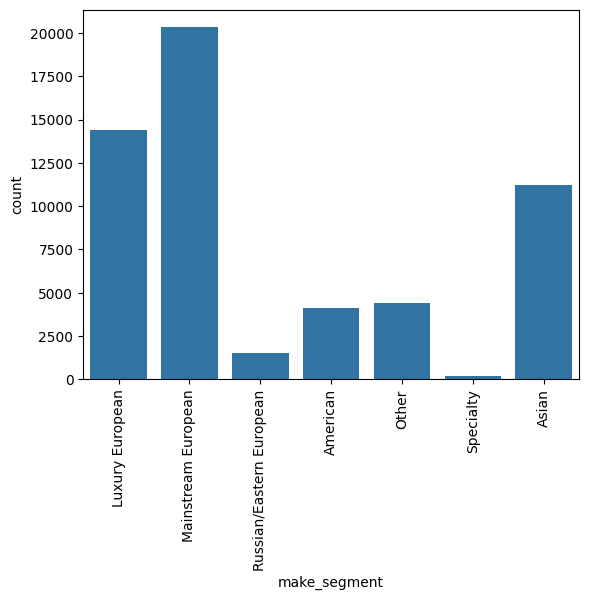

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['make_segment'], data=df)
plt.xticks(rotation=90)
plt.show()


In the dataset, most of the cars are european (particulary majority of the are Luxury followed by Mainstream and Russian/Eastern European). However the dataset also has american as well asian cars. There are also some speciality cars such as Tesla, McLaren, Bentley, etc. The dataset also has some cars that are not categorized into any of the above categories.

### Categorical Variable Distribution

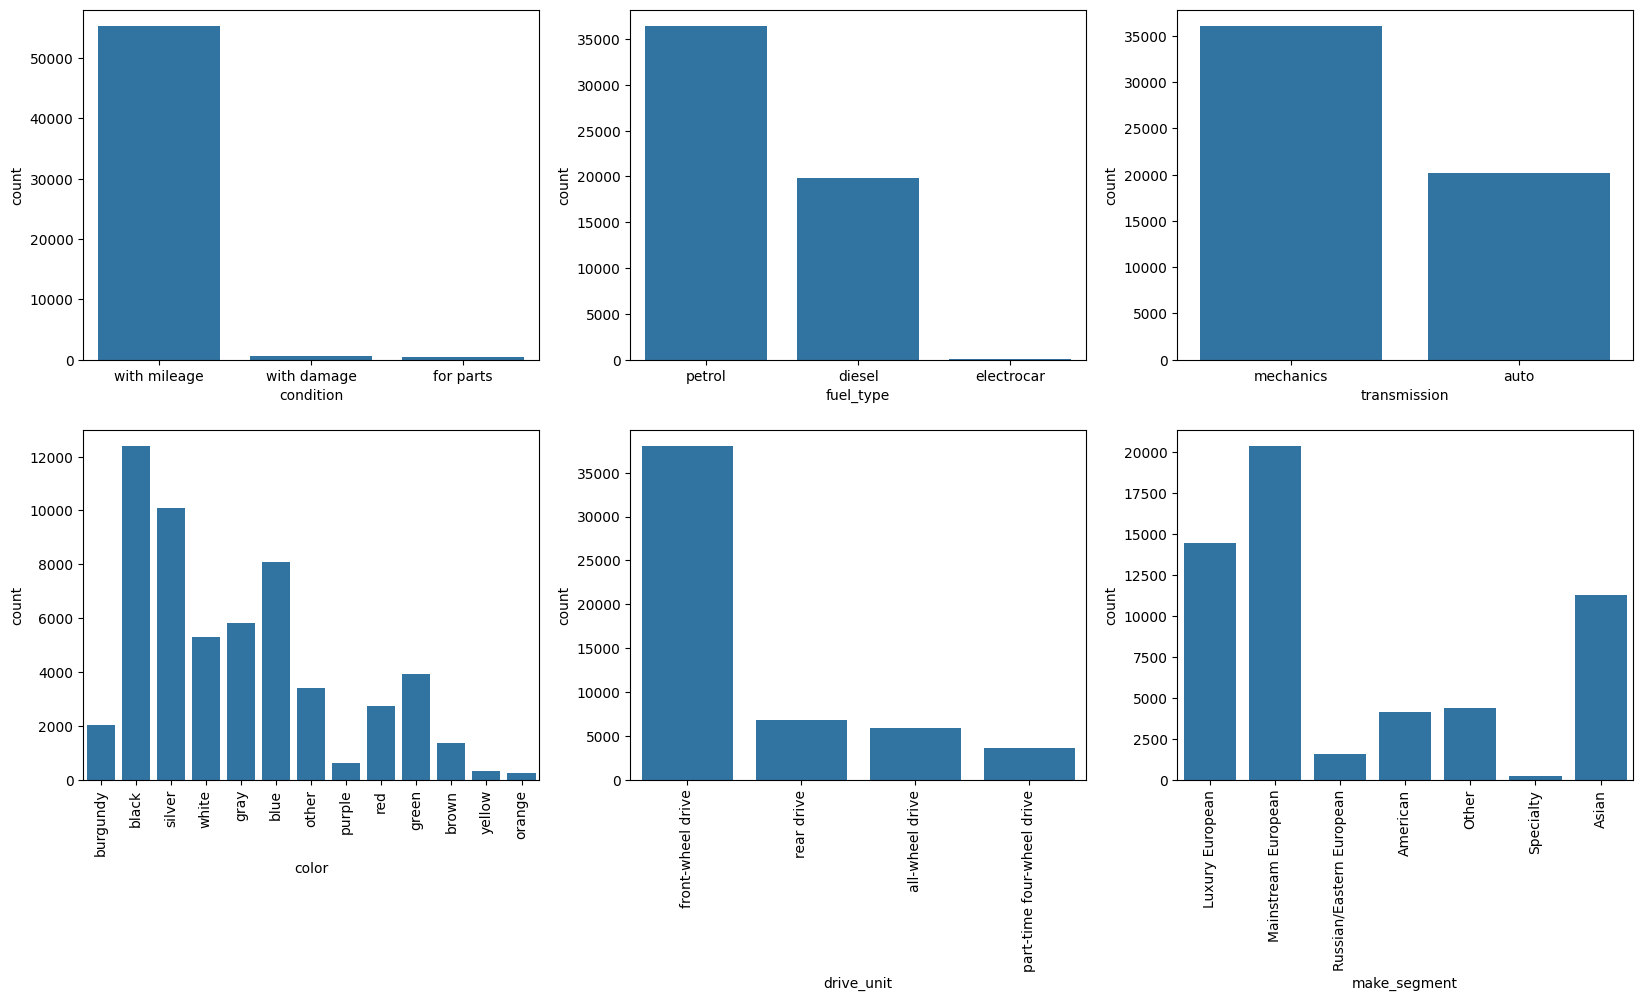

In [17]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

From the above graphs, we can get an overview regarding the data across the categorical variables in the data set. The from the above graphs it is clear that majority of the cars are being sold are in working condition, majority of them run on petrol, followed by diesel and hardly any of them runs on electricity. Most of the cars have manual transmission, with front wheel drive, having colors such as  balck, silver, blue, white, and grey.

### Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

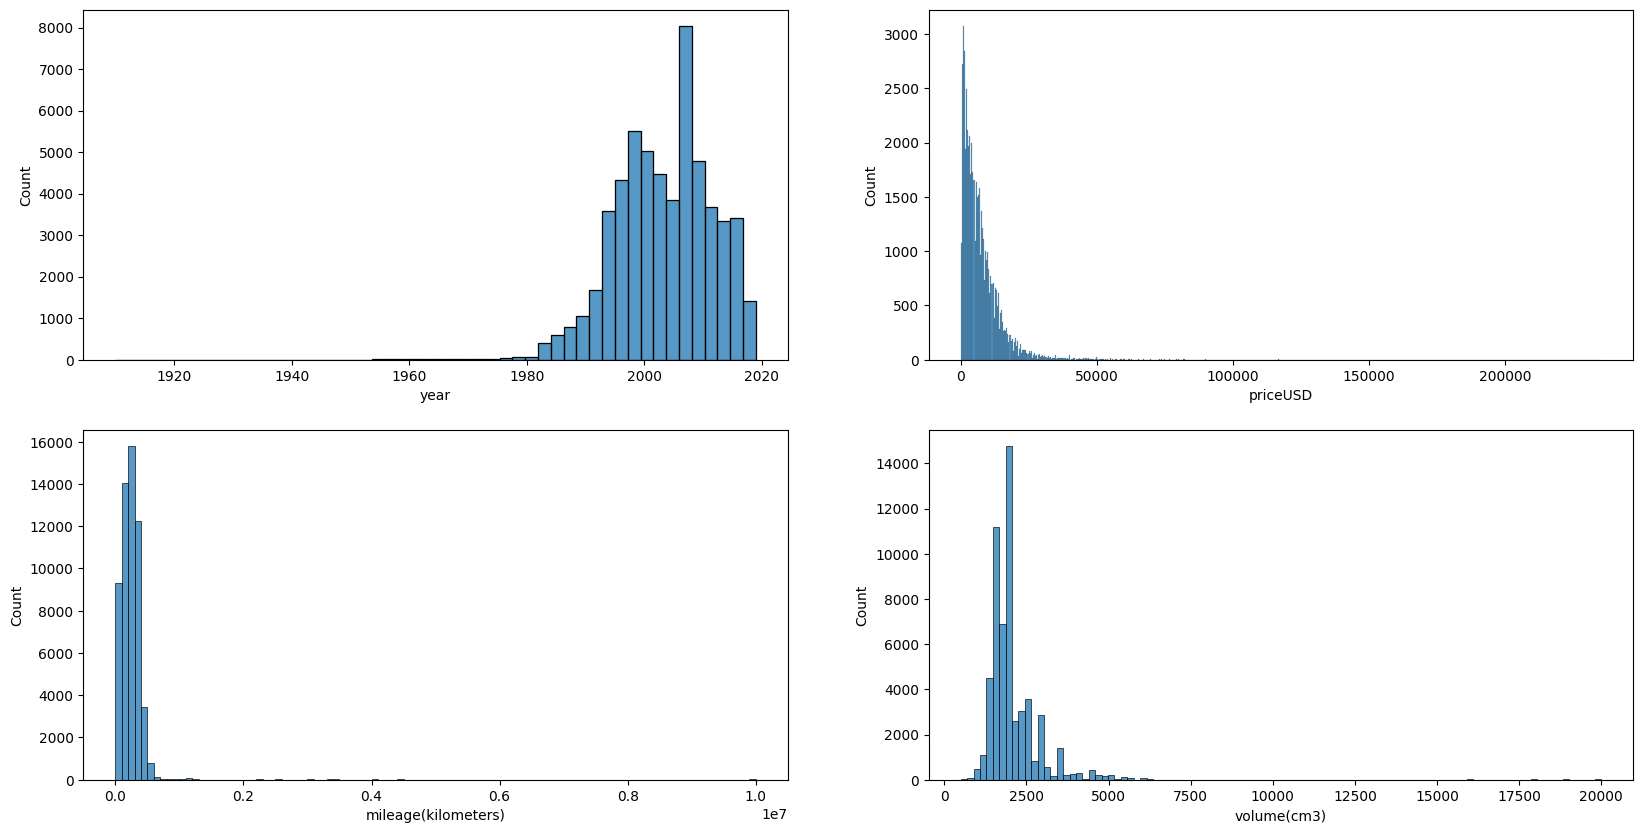

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.

In [14]:
df= df[df['year']>1980]

### Price and Make

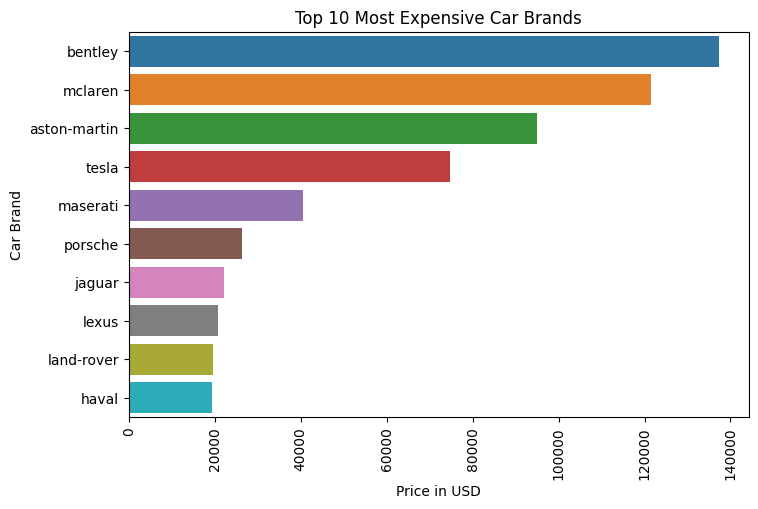

In [15]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

### Price and Condition

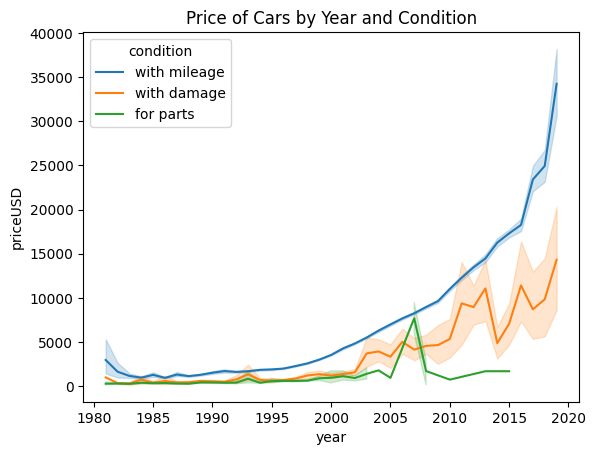

In [16]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with selling codition of the car. Cars, which are sold in working condition, are more expensive and their price increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had a similar price to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their price increased very little with time.

The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than the diesel ones. The cars running on electricity tend to have very high prices and low mileage.

### Price and Transmission

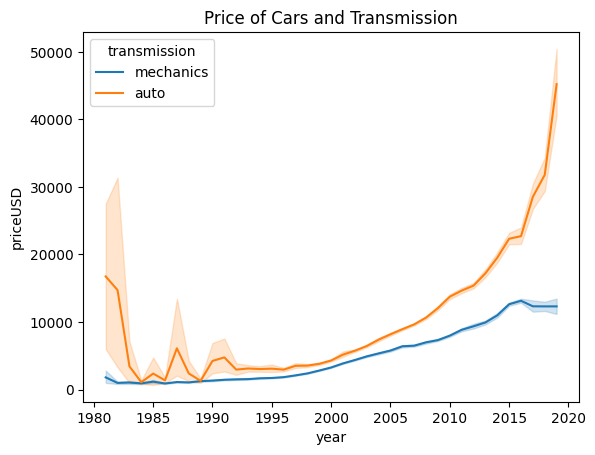

In [17]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

### Price and Fuel Type

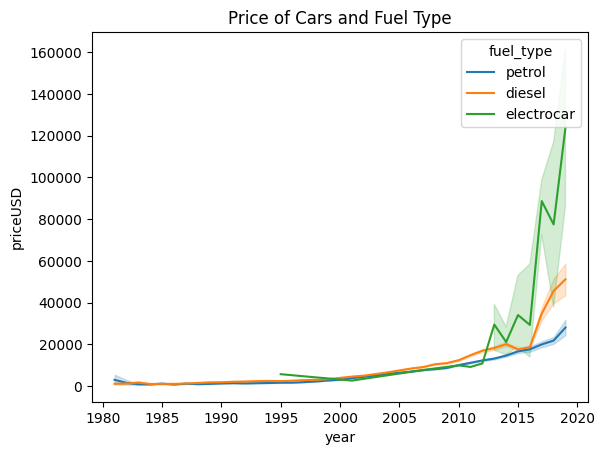

In [18]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Till 2005, there was no major difference in car price of cars running on petrol and diesel. However, after 2015, the price of the cars running on petrol increased significantly, whereas the price of the cars running on diesel increased with a very small margin. The graph also highloghts the introducttion of electro cars, which runs on electricity in 1995. However, the price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type

### Price and Drive Unit

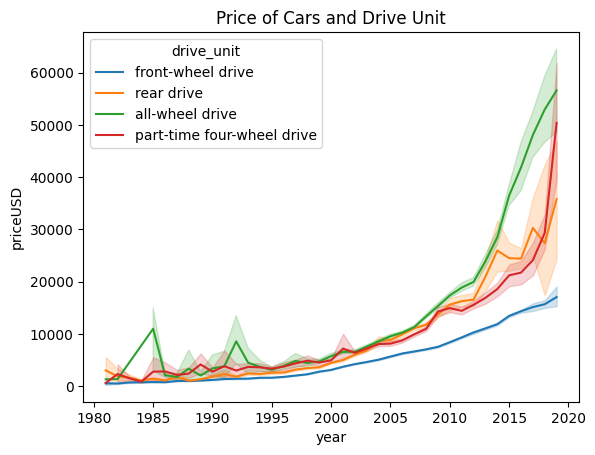

In [19]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 to 1995, there was not much difference in the price of the cars based on the drive unit. However after 1995, the price of the cars with front wheel drive increased at a slower pace as compared to other drive units. The price of the cats with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

### Price and Brand Segment

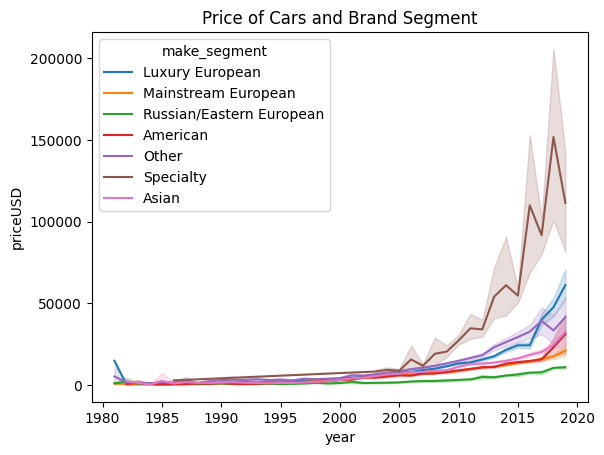

In [20]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

This graph shows the surge in car prices after 2005, where we can seen that the price of the specialty car segment increased significanlty followed by the luxury european car, American, Asian and Mainstream European car segment. The price of the Russian/Eastern European car segment increased at a slower pace as compared to other segments and is lowest among all the segments.

## Data Preprocessing Part 2

In [21]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

Since, the count of null values in small in comparison to that dataset size, I will be dropping the null values from the dataset.

In [22]:
df.dropna(inplace=True)

In [23]:
df.drop(columns=['make'], inplace=True)

#### Label encoding for object data type

In [25]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Correlation Matrix Heatmap

<Axes: >

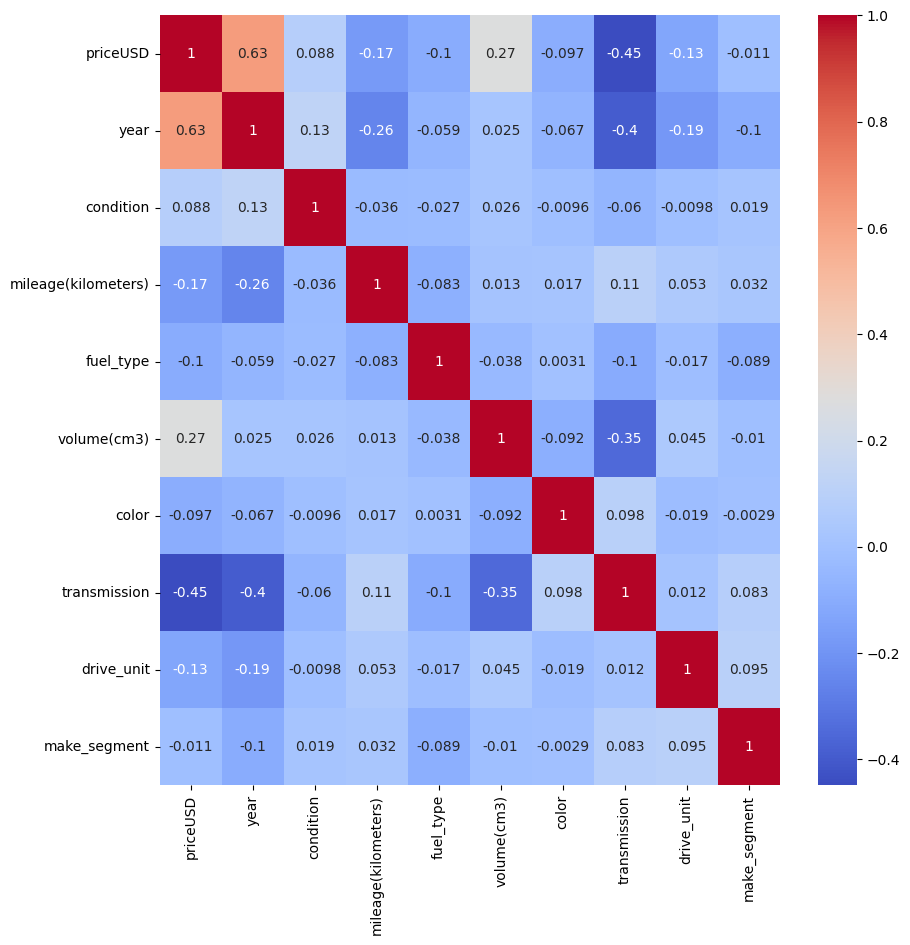

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Outlier Removal

In [28]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

## Model Building

### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

#### Hypertuning using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [43]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      random_state=0)

In [44]:
#training score
dtr.score(X_train, y_train)

0.8689232243678456

In [45]:
#predicting the test set
y_pred = dtr.predict(X_test)

## Model Evaluation

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8529954473045238
Mean Squared Error:  4704555.776616746
Mean Absolute Error:  1414.2804910704947
Root Mean Squared Error:  2168.9987959002524


## Feature Importance

In [47]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.754301
4,volume(cm3),0.200413
3,fuel_type,0.017333
6,transmission,0.010267
8,make_segment,0.009639
7,drive_unit,0.006883
2,mileage(kilometers),0.000872
5,color,0.000292
1,condition,0.000000


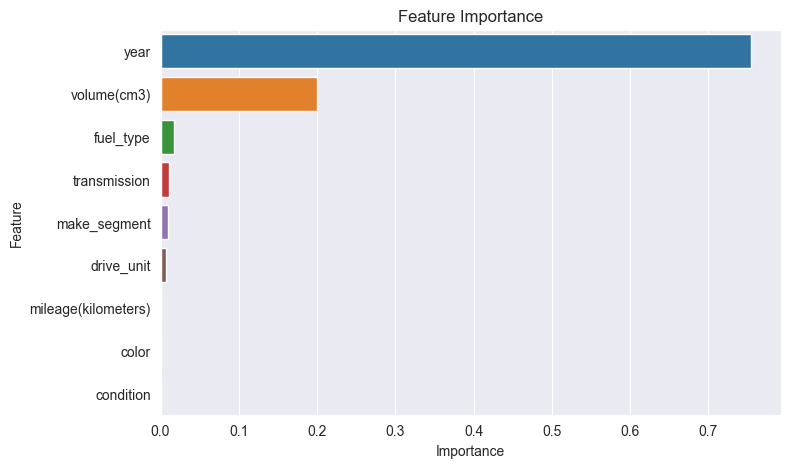

In [51]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

## Conclusion

The aim of this project was to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. During the exploratory data analysis, it was found that there has been a significant increase in car prices in Belarus after the year 2000. The cars which runs on petrol have automatic transmission have higher price has compared to diesel cars with manual transmission. However, the elctric cars are distinctively expensive than the other cars. The cars with all wheel drive have the highest price among all the drive units. The speciality segment cars have the highest price among all the segments followed by luxury european, american, asian car segments.

The decision tree regressor model was used to predict the car price. The model was able to predict the car price with 85.29% accuracy. The most important features for predicting the car price were found to be year and volume of the engine.